# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 06.10.2021

Мягкий дедлайн: 23:59MSK 25.10.2021

Жесткий дедлайн: 23:59MSK 28.10.2021

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [3]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2021-10-17 18:54:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘data.txt.zip’

data.txt.zip        100%[===================>] 201.24M  95.9MB/s    in 2.1s    

2021-10-17 18:54:17 (95.9 MB/s) - ‘data.txt.zip’ saved [211011981/211011981]



In [5]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34.56445,-5.07092,-47.75605,64.81513,-97.42948,-12.59418,55.23699,28.85657,54.53513,-31.97077,20.03279,-8.07892,-55.12617,26.58961,-10.27183,-30.64232,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.6

In [6]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

**Ridge регрессия**

In [6]:

# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
from sklearn import linear_model

clf_ridge = linear_model.Ridge(alpha=2)
clf_ridge.fit(X_train, y_train)

print("Среднеквадратичная ошибка на тренировочной выборке")
print(np.sqrt(np.mean((clf_ridge.predict(X_train) -  y_train) ** 2)))

print("Среднеквадратичная ошибка на тестовой выборке")
print(np.sqrt(np.mean((clf_ridge.predict(X_test) -  y_test) ** 2)))

Среднеквадратичная ошибка на тренировочной выборке
9.552822967904117
Среднеквадратичная ошибка на тестовой выборке
9.510160715258205


**Константный прогноз**

In [7]:
X_train_zero = np.zeros_like(X_train)
X_test_zero = np.zeros_like(X_test)
constant_clf_ridge = linear_model.Ridge(alpha=2)
constant_clf_ridge.fit(X_train_zero, y_train)

print("Лучший константный прогноз y =", constant_clf_ridge.intercept_)
print("Среднеквадратичная ошибка на тренировочной выборке")
print(np.sqrt(np.mean((constant_clf_ridge.predict(X_train_zero) -  y_train) ** 2)))

print("Среднеквадратичная ошибка на тестовой выборке")
print(np.sqrt(np.mean((constant_clf_ridge.predict(X_test_zero) -  y_test) ** 2)))

Лучший константный прогноз y = 1998.3860949074324
Среднеквадратичная ошибка на тренировочной выборке
10.939755150678016
Среднеквадратичная ошибка на тестовой выборке
10.85246390513634


In [8]:
np.mean(y_train)

1998.3860949074324

## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [7]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

# Эксперимент 1

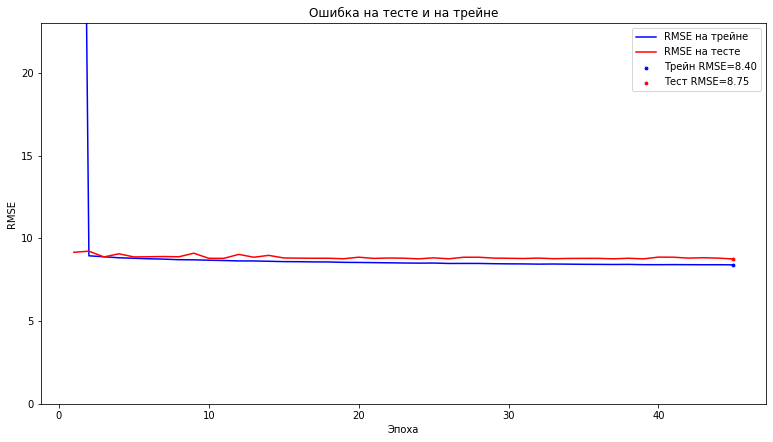

  0%|          | 0/14492 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [38]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from IPython.display import clear_output
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from torchvision import transforms
from torch.optim.lr_scheduler import ExponentialLR
%matplotlib inline
 
 
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
 
set_random_seed(42)
 
 
class BaseDataset(Dataset):
    def __init__(self, X_train, y_train, X_test, y_test, is_train=True):
        self.scaler_ = StandardScaler()
        self.X_train = self.scaler_.fit_transform(X_train)
        self.X_test = self.scaler_.transform(X_test)
        self.y_train = y_train
        self.y_test = y_test
        if is_train:
            self.X = self.X_train
            self.y = self.y_train
        else:
            self.X = self.X_test
            self.y = self.y_test
 
        self.X = torch.FloatTensor(self.X)
        self.y = torch.FloatTensor(self.y)
 
    def __len__(self):
        return self.X.shape[0]
 
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
 
def train(model, optimizer, criterion, train_loader, test_loader, scheduler=None):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    mean_test_loss_history = []
    mean_train_loss_history = []
    for epoch in range(400):
        train_loss = []
        test_loss = []
        for x_train, y_train in tqdm(train_loader):        # берем батч из трейн лоадера
            y_pred = model(x_train)                        # делаем предсказания
            loss = torch.sqrt(criterion(y_pred.flatten(), y_train))    # считаем лосс
            loss.backward()                                # считаем градиенты обратным проходом
            train_loss.append(loss.cpu().detach().numpy())
            optimizer.step()                               # обновляем параметры сети
            optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров
 
        mean_train_loss_history.append(np.mean(train_loss))
 
        with torch.no_grad():
            for x_test, y_test in tqdm(test_loader):
                y_pred = model(x_test)
                loss = torch.sqrt(criterion(y_pred.flatten(), y_test))
                test_loss.append(loss.cpu().numpy())
        mean_test_loss_history.append(np.mean(test_loss))
 
        if scheduler is not None:
            scheduler.step()
 
        clear_output(True)
 
        plt.figure(figsize=(13, 7))
        plt.title("Ошибка на тесте и на трейне")
        plt.ylim((0, 23))
        plt.xlabel("Эпоха")
        plt.ylabel("RMSE")
        plt.plot(np.arange(1, epoch + 2), mean_train_loss_history, color='b', label='RMSE на трейне')
        plt.plot(np.arange(1, epoch + 2), mean_test_loss_history, color='r', label='RMSE на тесте')
        plt.scatter(epoch + 1, mean_train_loss_history[-1], s=8, color='b', label='Трейн RMSE={:.2f}'.format(float(mean_train_loss_history[-1])))
        plt.scatter(epoch + 1, mean_test_loss_history[-1], s=8, color='r', label='Тест RMSE={:.2f}'.format(float(mean_test_loss_history[-1])))
        plt.legend()
        plt.show()
 
def get_init_weights(activation):
    assert activation in ['relu', 'elu', 'leaky_relu']
    if activation in ['relu', 'elu']:
        nonlinearity = 'relu'
    def init_weights(m):
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity=nonlinearity)
            m.bias.data.fill_(0.0)
    return init_weights
 
class YearPredictor(nn.Module):
    def __init__(self, hidden_layers, activation='elu', use_dropout=False, **kwargs):
        super(self.__class__, self).__init__()
        activation_mapping = {
            'relu' : nn.ReLU,
            'elu' : nn.ELU,
            'leaky_relu' : nn.LeakyReLU
        }
        assert activation in activation_mapping.keys()
        layers = []
        layers.append(nn.BatchNorm1d(hidden_layers[0]))
        layers.append(nn.Linear(hidden_layers[0], hidden_layers[1]))
 
        for i in range(len(hidden_layers) - 2):
            layers.append(activation_mapping[activation]())
            layers.append(nn.BatchNorm1d(hidden_layers[i + 1]))
            if use_dropout:
                layers.append(nn.Dropout(0.5))
            layers.append(nn.Linear(hidden_layers[i + 1], hidden_layers[i + 2]))
        
        self.model_ = nn.Sequential(*layers)
        self.model_.apply(get_init_weights(activation))
 
    def forward(self, inp):
        return self.model_(inp)
 
model = YearPredictor([90, 100, 40, 8, 1], use_dropout=False)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
scheduler = ExponentialLR(optimizer, gamma=0.95)
criterion = nn.MSELoss()
 
train_set = BaseDataset(X_train, y_train, X_test, y_test, is_train=True)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
 
test_set = BaseDataset(X_train, y_train, X_test, y_test, is_train=False)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)
 
 
 
train(
    model,
    optimizer,
    criterion, 
    train_loader,
    test_loader,
    scheduler=scheduler
)


In [41]:
scheduler.last_epoch

45

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ